# Task: Use any unsupervised technique to extract patterns or segregate data into groups.
User Story: User should be able to provide a data point (a row) and the program should be able to
identify to which group a given data point belongs to and why?

## Importing the required libraries

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt
import plotly.graph_objects as go
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

## Importing the dataset

In [ ]:
df=pd.read_csv("/content/Online_Retail.csv")

## Data Cleaning +EDA

In [ ]:
df.columns

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country'],
      dtype='object')

In [ ]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6.0,12/1/10 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6.0,12/1/10 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8.0,12/1/10 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6.0,12/1/10 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6.0,12/1/10 8:26,3.39,17850.0,United Kingdom


In [ ]:
df.shape

(102673, 8)

In [ ]:
df['Country'].unique()

array(['United Kingdom', 'France', 'Australia', 'Netherlands', 'Germany',
       'Norway', 'EIRE', 'Switzerland', 'Spain', 'Poland', 'Portugal',
       'Italy', 'Belgium', 'Lithuania', 'Japan', 'Iceland',
       'Channel Islands', 'Denmark', 'Cyprus', 'Sweden', 'Austria',
       'Israel', 'Finland', 'Bahrain', 'Greece', 'Hong Kong', 'Singapore',
       'Lebanon', 'United Arab Emirates', 'Saudi Arabia', nan],
      dtype=object)

In [ ]:
df['Country'].nunique()

30

In [ ]:
df['Country'].value_counts().sort_values(ascending=False)

United Kingdom          94864
Germany                  1741
France                   1477
EIRE                     1026
Spain                     560
Netherlands               492
Switzerland               289
Portugal                  285
Belgium                   275
Cyprus                    256
Australia                 243
Norway                    179
Italy                     169
Japan                     154
Sweden                     74
Poland                     61
Iceland                    60
Channel Islands            59
Hong Kong                  57
Singapore                  56
Lebanon                    45
Denmark                    40
Finland                    40
Lithuania                  35
Israel                     32
Greece                     32
Austria                    30
United Arab Emirates       30
Saudi Arabia                9
Bahrain                     2
Name: Country, dtype: int64

In [ ]:
df_country=df['Country'].value_counts().sort_values().tail(10).to_frame().reset_index()

In [ ]:
px.bar(x=df_country['index'],y=df_country['Country'],log_y=True,title='Top 10 Countries')

In [ ]:
plt.rcParams['figure.figsize'] = [12, 12]

In [ ]:
for i in df.columns:
  print(i,df[i].dtype,'\n')

InvoiceNo object 

StockCode object 

Description object 

Quantity int64 

InvoiceDate object 

UnitPrice float64 

CustomerID float64 

Country object 



In [ ]:
df_uk=df[df['Country']=='United Kingdom']
print(df_uk.shape)
print(df_uk.head())

(94864, 8)
  InvoiceNo StockCode                          Description  Quantity  \
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER       6.0   
1    536365     71053                  WHITE METAL LANTERN       6.0   
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER       8.0   
3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE       6.0   
4    536365    84029E       RED WOOLLY HOTTIE WHITE HEART.       6.0   

    InvoiceDate  UnitPrice  CustomerID         Country  
0  12/1/10 8:26       2.55     17850.0  United Kingdom  
1  12/1/10 8:26       3.39     17850.0  United Kingdom  
2  12/1/10 8:26       2.75     17850.0  United Kingdom  
3  12/1/10 8:26       3.39     17850.0  United Kingdom  
4  12/1/10 8:26       3.39     17850.0  United Kingdom  


chose UK because model might have undergone underfitting due to small number of data points available for other countries.

In [ ]:
df_uk['CustomerID'].nunique()

1539

In [ ]:
df_uk.isna().sum()

InvoiceNo          0
StockCode          0
Description      301
Quantity           0
InvoiceDate        0
UnitPrice          0
CustomerID     35245
Country            0
dtype: int64

In [ ]:
df_uk.duplicated().sum()

919

In [ ]:
df_uk.drop_duplicates(keep='first',inplace=True)

In [ ]:
df_uk.dropna(axis=0,inplace=True)

In [ ]:
df_uk.isna().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

In [ ]:
df_uk.shape

(58707, 8)

In [ ]:
df_uk['CustomerID'].nunique()

1539

In [ ]:
df_uk.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6.0,12/1/10 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6.0,12/1/10 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8.0,12/1/10 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6.0,12/1/10 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6.0,12/1/10 8:26,3.39,17850.0,United Kingdom


In [ ]:
df_uk['Price']=df_uk['Quantity']*df_uk['UnitPrice']

In [ ]:
df_uk.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Price
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6.0,12/1/10 8:26,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6.0,12/1/10 8:26,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8.0,12/1/10 8:26,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6.0,12/1/10 8:26,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6.0,12/1/10 8:26,3.39,17850.0,United Kingdom,20.34


In [ ]:
df_uk.groupby('CustomerID')['Price'].sum()

CustomerID
12346.0       0.00
12747.0    1009.31
12748.0    4653.01
12820.0     170.46
12823.0     535.50
            ...   
18259.0     376.30
18260.0     769.52
18269.0     138.90
18277.0     -12.75
18283.0     213.75
Name: Price, Length: 1539, dtype: float64

In [ ]:
df_uk[df_uk['CustomerID']==18277.0]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Price
70604,C542086,22423,REGENCY CAKESTAND 3 TIER,-1.0,1/25/11 12:34,12.75,18277.0,United Kingdom,-12.75


need to get rid of -sign from quantity

In [ ]:
df_uk['Quantity'] = df_uk['Quantity'].abs()

In [ ]:
df_uk[df_uk['CustomerID']==18277.0]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Price
70604,C542086,22423,REGENCY CAKESTAND 3 TIER,1.0,1/25/11 12:34,12.75,18277.0,United Kingdom,12.75


In [ ]:
df_uk['CustomerID']=df_uk['CustomerID'].astype(str)

In [ ]:
df_uk.groupby('CustomerID')['Price'].sum()

CustomerID
12346.0    154367.20
12747.0      1009.31
12748.0      4753.91
12820.0       170.46
12823.0       535.50
             ...    
18259.0       376.30
18260.0       806.02
18269.0       198.30
18277.0        12.75
18283.0       213.75
Name: Price, Length: 1539, dtype: float64

In [ ]:
df1=df_uk.groupby('CustomerID')['Price'].sum().to_frame().reset_index()

In [ ]:
df1.head()

,CustomerID,Price
0,12346.0,154367.20
1,12747.0,1009.31
2,12748.0,4753.91
3,12820.0,170.46
4,12823.0,535.50


In [ ]:
df_uk.groupby('CustomerID')['InvoiceNo'].count()

CustomerID
12346.0      2
12747.0     20
12748.0    708
12820.0     11
12823.0      2
          ... 
18259.0      7
18260.0     40
18269.0      8
18277.0      1
18283.0    101
Name: InvoiceNo, Length: 1539, dtype: int64

how many times a customer has bought some item from the store

In [ ]:
df2=df_uk.groupby('CustomerID')['InvoiceNo'].count().to_frame().reset_index().rename({'InvoiceNo':'Frequency'},axis=1)

In [ ]:
df_final=pd.merge(df1,df2,on='CustomerID',how='inner')

In [ ]:
df_final.head()

,CustomerID,Price,Frequency
0,12346.0,154367.20,2
1,12747.0,1009.31,20
2,12748.0,4753.91,708
3,12820.0,170.46,11
4,12823.0,535.50,2


In [ ]:
fig=px.box(df_final,y='Frequency')

In [ ]:
fig.show()

In [ ]:
fig=px.box(df_final,y='Price')

In [ ]:
fig.show()

manually removing the data of thecustomer where the price is max

In [ ]:
df_final['Price'].max()

154367.2

In [ ]:
df_final=df_final[df_final['Price']<(df_final['Price'].max())]

In [ ]:
fig=px.box(df_final,y='Price')
fig.show()

but there are more outliers we might need to remove values that might disturb our final results
an outlier is basically any data point that is more than three standard deviations above the median

In [ ]:
df_final=df_final[df_final['Price'] < ((df_final['Price'].median())  + df_final['Price'].std()*3)]

In [ ]:
df_final=df_final[df_final['Frequency'] < ((df_final['Frequency'].median())  + df_final['Frequency'].std()*3)]

In [ ]:
df_final.shape

(1490, 3)

In [ ]:
fig = px.scatter(x=df_final['Price'] , y=df_final['Frequency'],marginal_x="histogram")

In [ ]:
fig.show()

### Scaling the data

In [ ]:
X=df_final[['Price','Frequency']]
scaler=MinMaxScaler()
scaled_X=scaler.fit_transform(X)

In [ ]:
scaled_X.shape

(1490, 2)

### Fitting the model to our data

In [ ]:
model=KMeans(n_clusters=3)
model.fit(scaled_X)
labels=model.labels_

In [ ]:
labels.shape

(1490,)

In [ ]:
centroids=model.cluster_centers_

In [ ]:
centroids

array([[0.13721577, 0.28089707],
       [0.05514617, 0.07410358],
       [0.28571368, 0.6242405 ]])

In [ ]:
df_fin=df_final.copy()
df_fin['Labels']=labels
df_fin.head()

,CustomerID,Price,Frequency,Labels
1,12747.0,1009.31,20,1
3,12820.0,170.46,11,1
4,12823.0,535.50,2,1
5,12826.0,697.10,49,0
6,12829.0,332.95,12,1


In [ ]:
data_s=pd.DataFrame(scaled_X).rename({0:'Price',1:'Frequency'},axis=1)

In [ ]:
data_s.head()

,Amount,Frequency
0,0.175580,0.112426
1,0.029472,0.059172
2,0.093054,0.005917
3,0.121200,0.284024
4,0.057774,0.065089


In [ ]:
data_s['Labels']=labels

### Visualizing the clusters

In [ ]:
df_red=data_s[data_s['Labels']==1]

In [ ]:
df_green=data_s[data_s['Labels']==0]
df_blue=data_s[data_s['Labels']==2]

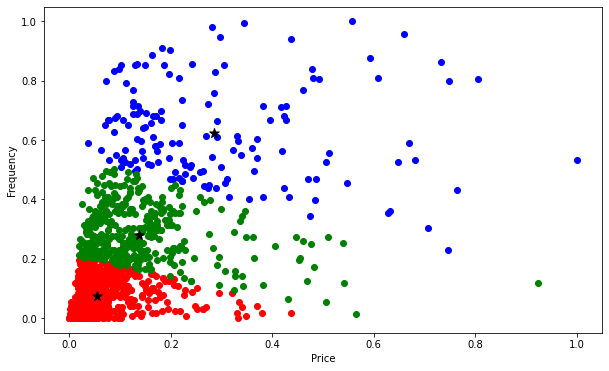

In [ ]:
fig, ax = plt.subplots(figsize=(10, 6))
plt.scatter(x=df_red['Price'],y=df_red['Frequency'],color='red')
plt.scatter(x=df_blue['Price'],y=df_blue['Frequency'],color='blue')
plt.scatter(x=df_green['Price'],y=df_green['Frequency'],color='green')
plt.scatter(centroids[0,0], centroids[0,1], marker='*', s=100,
            c='black', label='centroid')
plt.scatter(centroids[1,0], centroids[1,1], marker='*', s=100,
            c='black', label='centroid')
plt.scatter(centroids[2,0], centroids[2,1], marker='*', s=100,
            c='black', label='centroid')
plt.xlabel("Price")
plt.ylabel("Frequency")
plt.show()

#### Choosing the right K(number of clusters)

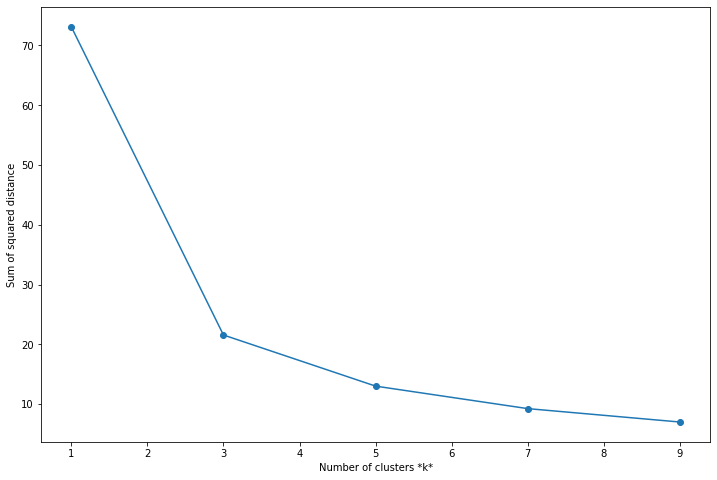

In [ ]:
plt.rcParams['figure.figsize'] = [12, 8]
sse = []
list_k = list(range(1, 11,2))

for k in list_k:
    km = KMeans(n_clusters=k)
    km.fit(scaled_X)
    sse.append(km.inertia_)

# Plot sse against k
plt.plot(list_k, sse, '-o')
plt.xlabel(r'Number of clusters *k*')
plt.ylabel('Sum of squared distance');

In [ ]:
fig = go.Figure()
dfs = {"Cluster 2" : df_red, "Cluster 1": df_green, "Cluster 3" : df_blue}
for i in dfs:
    fig = fig.add_trace(go.Scatter(x = dfs[i]["Price"],
                                   y = dfs[i]["Frequency"], 
                                   name = i))
fig.show()

In [ ]:

list_k = list(range(1, 11,2))

for i in list_k:
    km = KMeans(n_clusters=k)
    km.fit(scaled_X)
    labels=km.labels_
    print("for ",i,"cluster silhouette score is",silhouette_score(scaled_X,labels))

for  1 cluster silhouette score is 0.4000545305785132
for  3 cluster silhouette score is 0.4080302163490613
for  5 cluster silhouette score is 0.40014499607577253
for  7 cluster silhouette score is 0.3999008406046787
for  9 cluster silhouette score is 0.3988872381865129


In [ ]:
model=KMeans(n_clusters=3)
model.fit(scaled_X)
labels=model.labels_

### Predicting the label for a new dataset

In [ ]:
x=np.array([0.175580,0.112426])

In [ ]:
x=np.reshape(x,(-1,2))

In [ ]:
model.predict(x)

array([2], dtype=int32)

In [ ]:
df_final['Cluster_Labels']=labels

In [ ]:
px.box(x=df_final['Cluster_Labels'],y=df_final['Price'],color=df_final['Cluster_Labels'])

In [ ]:
px.box(x=df_final['Cluster_Labels'],y=df_final['Frequency'],color=df_final['Cluster_Labels'])

A standard definition is that an outlier is any data point that is more than three standard deviations above the median

In [ ]:
#wrangled_df = wrangled_df[wrangled_df['2011 revenue'] 
#                          < ((wrangled_df['2011 revenue'].median()) 
#                             + wrangled_df['2011 revenue'].std()*3)]

wrangled_df = wrangled_df[~wrangled_df['2010 revenue'].isnull()]

In [ ]:
###operations = {'revenue':'sum','InvoiceDate':'first','CustomerID':'first' }

##df = df.groupby('InvoiceNo').agg(operations)